<a href="https://colab.research.google.com/github/Youruler1/ColabTesting/blob/main/IrisNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [92]:
# creating class for nn model
class Model(nn.Module):
  def __init__(self, input_features=4, h1=4, h2=3, output_features=3):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_features)

  def forward(self, x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    return self.out(x)

In [93]:
torch.manual_seed(41) # manual seed for inherent randomness
model = Model()

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [96]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [98]:
# df['species'].replace('setosa',0.0)
# df['species'].replace('versicolor', 1.0)
# df['species'].replace('virginica', 2.0)
df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

<ipython-input-98-e99a02023652>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})


In [99]:
# separating the training features and target features
X = df.drop('species', axis=1)
Y = df['species']

# converting to numpy arrays
X = X.values
Y = Y.values

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=31, test_size=0.2)

In [102]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [103]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [104]:
# Training the model
epochs = 700
losses = []

for i in range(epochs):
  Y_pred = model.forward(X_train)
  loss = criterion(Y_pred, Y_train)
  losses.append(loss.detach().numpy())
  if i%10 == 0 :
    print(f"Epoch: {i} and Loss: {loss}")
  optimizer.zero_grad
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 1.2030147314071655
Epoch: 10 and Loss: 1.1875133514404297
Epoch: 20 and Loss: 1.1722782850265503
Epoch: 30 and Loss: 1.15755295753479
Epoch: 40 and Loss: 1.14357328414917
Epoch: 50 and Loss: 1.1296749114990234
Epoch: 60 and Loss: 1.1160972118377686
Epoch: 70 and Loss: 1.1069772243499756
Epoch: 80 and Loss: 1.0997405052185059
Epoch: 90 and Loss: 1.0922671556472778
Epoch: 100 and Loss: 1.0854560136795044
Epoch: 110 and Loss: 1.0791068077087402
Epoch: 120 and Loss: 1.0711848735809326
Epoch: 130 and Loss: 1.060759425163269
Epoch: 140 and Loss: 1.046964406967163
Epoch: 150 and Loss: 1.024781346321106
Epoch: 160 and Loss: 0.9924435019493103
Epoch: 170 and Loss: 0.9536949396133423
Epoch: 180 and Loss: 0.9102605581283569
Epoch: 190 and Loss: 0.8627563118934631
Epoch: 200 and Loss: 0.816758930683136
Epoch: 210 and Loss: 0.7662714123725891
Epoch: 220 and Loss: 0.7143053412437439
Epoch: 230 and Loss: 0.6670464277267456
Epoch: 240 and Loss: 0.624785304069519
Epoch: 250 and Loss:

Text(0.5, 0, 'epochs')

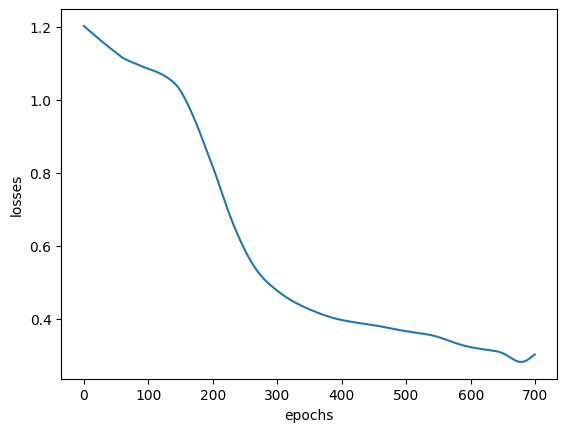

In [105]:
plt.plot(range(epochs), losses)
plt.ylabel('losses')
plt.xlabel('epochs')

In [108]:
# evaluating the model
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, Y_test)

loss

tensor(0.4475)

In [110]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_eval = model.forward(data)
    print(f"{i}.)\t{str(y_eval)}\t{Y_test[i]}")
    if y_eval.argmax().item() == Y_test[i]:
      correct += 1

print(f"We got {correct} correct !")

0.)	tensor([-5.6116,  2.9723,  3.5420])	1
1.)	tensor([-11.8965,   4.8625,   7.7075])	2
2.)	tensor([ 18.8727, -17.8334, -16.2575])	0
3.)	tensor([-4.2527,  2.5637,  2.6414])	1
4.)	tensor([-10.4898,   4.4395,   6.7752])	2
5.)	tensor([ 17.2080, -16.1241, -14.8415])	0
6.)	tensor([-8.6780,  3.8946,  5.5744])	2
7.)	tensor([-3.5308,  2.3466,  2.1630])	1
8.)	tensor([ 24.0275, -23.1651, -20.6788])	0
9.)	tensor([ 20.0187, -19.0230, -17.2444])	0
10.)	tensor([-9.2836,  4.0767,  5.9758])	2
11.)	tensor([-4.6867,  2.6942,  2.9290])	1
12.)	tensor([-7.5608,  3.5586,  4.8339])	2
13.)	tensor([ 19.4811, -18.4557, -16.7727])	0
14.)	tensor([-11.4555,   4.7299,   7.4152])	2
15.)	tensor([-8.4724,  3.8327,  5.4381])	1
16.)	tensor([-8.0540,  3.7069,  5.1608])	1
17.)	tensor([-5.8146,  3.0334,  3.6766])	1
18.)	tensor([-11.5250,   4.7508,   7.4614])	2
19.)	tensor([ 17.0865, -15.9900, -14.7293])	0
20.)	tensor([-10.2630,   4.3712,   6.6249])	2
21.)	tensor([-12.7070,   5.1063,   8.2447])	2
22.)	tensor([ 16.8906, -15.7